In [1]:
import gc
import os
from pathlib import Path
import random
import sys

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

# --- plotly ---
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly as po
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

# --- models ---
from sklearn import preprocessing
from sklearn.model_selection import KFold
import lightgbm as lgb

# --- setup ---
pd.set_option('max_columns', 50)

In [2]:
###  _______ 1. EDA using Machine Learning _______ ###

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

data = pd.read_csv("C:\\Users\\crazy\\OneDrive\\Documents\\python\\covid_19_data.csv")

In [4]:
countries_affected=data['Country/Region'].unique()


print("\nBasic info of the data-set\n")
data.info()



Basic info of the data-set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [5]:
countries_affected=data['Country/Region'].unique()
countries_affected

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [6]:

cntry=input("Enter which countries detailed Covid-19 cases you want to view : ")
data[data['Country/Region']==cntry]


Enter which countries detailed Covid-19 cases you want to view : Russia


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
482,483,01/31/2020,NaN,Russia,1/31/2020 23:59,2.0,0.0,0.0
540,541,02/01/2020,NaN,Russia,1/31/2020 16:13,2.0,0.0,0.0
610,611,02/02/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
677,678,02/03/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
745,746,02/04/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
235986,235987,02/27/2021,Vologda Oblast,Russia,2021-02-28 05:22:20,39097.0,799.0,35653.0
235988,235989,02/27/2021,Voronezh Oblast,Russia,2021-02-28 05:22:20,67572.0,1903.0,61427.0
236003,236004,02/27/2021,Yamalo-Nenets Autonomous Okrug,Russia,2021-02-28 05:22:20,37071.0,398.0,35048.0
236005,236006,02/27/2021,Yaroslavl Oblast,Russia,2021-02-28 05:22:20,32668.0,397.0,31016.0


In [7]:
countries_affected=data['Country/Region'].unique()

confirmed_cases=[]

for i in countries_affected:
    confirmed_cases.append(max(data[data['Country/Region']==i]['Confirmed']))

recovered_cases=[]

for i in countries_affected:
    recovered_cases.append(max(data[data['Country/Region']==i]['Recovered']))
recovered_cases[4]=312504

deaths=[]

for i in countries_affected:
    deaths.append(max(data[data['Country/Region']==i]['Deaths']))
deaths[4]=48055


In [8]:
df1=[countries_affected,confirmed_cases,recovered_cases,deaths]

new_data = pd.DataFrame(df1).T

mod_data = pd.DataFrame(df1).T

mod_data.columns = ['Countries','Confirmed','Recovered','Dead']
mod_data.sort_values('Confirmed',axis=0,ascending=False,inplace=True)
mod_data.set_index(np.arange(1,len(mod_data)+1),inplace=True)

new_data.columns = ['Countries','Confirmed','Recovered','Dead']
new_data.sort_values('Confirmed',axis=0,ascending=False,inplace=True)
new_data.set_index(np.arange(1,len(new_data)+1),inplace=True)


In [9]:
new_data

,Countries,Confirmed,Recovered,Dead
1,France,3664050.0,228299.0,85141.0
2,UK,3653272.0,4122.0,108208.0
3,US,3563578.0,312504,48055
4,Turkey,2693164.0,2565723.0,28503.0
5,India,2146777.0,2020951.0,52092.0
...,...,...,...,...
223,Republic of the Congo,1.0,0.0,0.0
224,The Bahamas,1.0,0.0,0.0
225,The Gambia,1.0,0.0,0.0
226,"Gambia, The",1.0,0.0,0.0


In [10]:
cnt=input("Enter which countries latest updated data you want to view : ")
new_data.loc[new_data['Countries']==cnt]


Enter which countries latest updated data you want to view : Russia


,Countries,Confirmed,Recovered,Dead
13,Russia,976739.0,895879.0,15007.0


In [10]:
recovered_percent=[]

dead_percent=[]

for i in range(0,len(mod_data)):
    recovered_percent.append((mod_data.iloc[i]['Recovered']/mod_data.iloc[i]['Confirmed']) * 100)
    dead_percent.append((mod_data.iloc[i]['Dead']/mod_data.iloc[i]['Confirmed']) * 100)

np.array(recovered_percent).T
mod_data.insert(4,'Recovered_Percentage',np.array(recovered_percent))
mod_data.insert(5,'Dead_Percentage',np.array(dead_percent))


In [11]:

mod_data[mod_data['Recovered_Percentage']>=0]


,Countries,Confirmed,Recovered,Dead,Recovered_Percentage,Dead_Percentage
1,France,3664050.0,228299.0,85141.0,6.230783,2.323686
2,UK,3653272.0,4122.0,108208.0,0.112830,2.961948
3,US,3563578.0,312504,48055,8.769389,1.348504
4,Turkey,2693164.0,2565723.0,28503.0,95.267982,1.058346
5,India,2146777.0,2020951.0,52092.0,94.138842,2.426521
...,...,...,...,...,...,...
223,Republic of the Congo,1.0,0.0,0.0,0.000000,0.000000
224,The Bahamas,1.0,0.0,0.0,0.000000,0.000000
225,The Gambia,1.0,0.0,0.0,0.000000,0.000000
226,"Gambia, The",1.0,0.0,0.0,0.000000,0.000000


In [12]:
# Countries which had taken strict measures on Covid-19
mod_data[mod_data['Recovered_Percentage']>=65]

,Countries,Confirmed,Recovered,Dead,Recovered_Percentage,Dead_Percentage
4,Turkey,2693164.0,2565723.0,28503.0,95.267982,1.058346
5,India,2146777.0,2020951.0,52092.0,94.138842,2.426521
6,Argentina,2104197.0,1899087.0,51946.0,90.252339,2.468685
7,Brazil,2037267.0,1805549.0,59428.0,88.626037,2.917045
8,Poland,1696885.0,1414461.0,43656.0,83.356326,2.572714
...,...,...,...,...,...,...
200,Marshall Islands,4.0,4.0,0.0,100.000000,0.000000
204,Samoa,3.0,2.0,0.0,66.666667,0.000000
213,Vanuatu,1.0,1.0,0.0,100.000000,0.000000
216,Gibraltar,1.0,1.0,0.0,100.000000,0.000000


In [13]:
# Countries which had not taken strict measures on Covid-19
mod_data[mod_data['Recovered_Percentage']<45]

,Countries,Confirmed,Recovered,Dead,Recovered_Percentage,Dead_Percentage
1,France,3664050.0,228299.0,85141.0,6.230783,2.323686
2,UK,3653272.0,4122.0,108208.0,0.112830,2.961948
3,US,3563578.0,312504,48055,8.769389,1.348504
21,Spain,583862.0,150376.0,27104.0,25.755401,4.642193
27,Belgium,515391.0,31130.0,22052.0,6.040074,4.278693
30,Serbia,456450.0,15564.0,4429.0,3.409793,0.970314
47,Netherlands,255335.0,7563.0,6137.0,2.961991,2.403509
54,Ireland,218980.0,23364.0,4313.0,10.669468,1.969586
66,Honduras,169754.0,66447.0,4141.0,39.143113,2.439412
71,Sweden,155151.0,4971.0,4562.0,3.203975,2.940361


In [14]:
data_india = data[data['Country/Region']=='India']
data_india.drop(columns=['SNo','Province/State','Country/Region','Last Update'],inplace=True)
dataind = data_india.groupby('ObservationDate')
dataind = dataind.head(len(dataind))

# Normalized data for india
print("\n\t\tNORMAILZED DATA\t\t\n")
dataind


		NORMAILZED DATA		



,ObservationDate,Confirmed,Deaths,Recovered
430,01/30/2020,1.0,0.0,0.0
491,01/31/2020,1.0,0.0,0.0
547,02/01/2020,1.0,0.0,0.0
607,02/02/2020,2.0,0.0,0.0
672,02/03/2020,3.0,0.0,0.0
...,...,...,...,...
235939,02/27/2021,33417.0,391.0,32985.0
235954,02/27/2021,0.0,0.0,0.0
235965,02/27/2021,603427.0,8725.0,592556.0
235966,02/27/2021,97031.0,1692.0,94850.0


In [15]:
### _____ 2. Time series analysis on covid-19 _____ ###

In [16]:
from datetime import datetime

def _convert_date_str(df):
    try:
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]
    except:
        print('_convert_date_str failed with %y, try %Y')
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]

In [17]:
confirmed_global_df = pd.read_csv('D:\\eda_paper\\time_series_covid19_confirmed_global.csv')
confirmed_global_df1 = pd.read_csv('D:\\eda_paper\\time_series_covid19_confirmed_global.csv')
_convert_date_str(confirmed_global_df)

deaths_global_df = pd.read_csv('D:\\eda_paper\\time_series_covid19_deaths_global.csv')
deaths_global_df1 = pd.read_csv('D:\\eda_paper\\time_series_covid19_deaths_global.csv')
_convert_date_str(deaths_global_df)

recovered_global_df = pd.read_csv('D:\\eda_paper\\time_series_covid19_recovered_global.csv')
recovered_global_df1 = pd.read_csv('D:\\eda_paper\\time_series_covid19_recovered_global.csv')
_convert_date_str(recovered_global_df)

In [31]:
# Filter out problematic data points (The West Bank and Gaza had a negative value, cruise ships were associated with Canada, etc.)
removed_states = "Recovered|Grand Princess|Diamond Princess"
removed_countries = "US|The West Bank and Gaza"

confirmed_global_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)
deaths_global_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)
recovered_global_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)

confirmed_global_df = confirmed_global_df[~confirmed_global_df["Province_State"].replace(np.nan, "nan").str.match(removed_states)]
deaths_global_df    = deaths_global_df[~deaths_global_df["Province_State"].replace(np.nan, "nan").str.match(removed_states)]
recovered_global_df = recovered_global_df[~recovered_global_df["Province_State"].replace(np.nan, "nan").str.match(removed_states)]

confirmed_global_df = confirmed_global_df[~confirmed_global_df["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
deaths_global_df    = deaths_global_df[~deaths_global_df["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
recovered_global_df = recovered_global_df[~recovered_global_df["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
confirmed_global_melt_df = confirmed_global_df.melt(
    id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=confirmed_global_df.columns[4:], var_name='Month', value_name='ConfirmedCases')
deaths_global_melt_df = deaths_global_df.melt(
    id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=confirmed_global_df.columns[4:], var_name='Month', value_name='Deaths')
recovered_global_melt_df = deaths_global_df.melt(
    id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=confirmed_global_df.columns[4:], var_name='Month', value_name='Recovered')

In [32]:
train = confirmed_global_melt_df.merge(deaths_global_melt_df, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Month'])
train = train.merge(recovered_global_melt_df, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Month'])

In [33]:
 # --- US ---
confirmed_us_df = pd.read_csv('D:\\eda_paper\\time_series_covid19_confirmed_US.csv')
deaths_us_df = pd.read_csv('D:\\eda_paper\\time_series_covid19_deaths_US.csv')

confirmed_us_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key'], inplace=True, axis=1)
deaths_us_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key', 'Population'], inplace=True, axis=1)

confirmed_us_df.rename({'Long_': 'Long'}, axis=1, inplace=True)
deaths_us_df.rename({'Long_': 'Long'}, axis=1, inplace=True)

_convert_date_str(confirmed_us_df)
_convert_date_str(deaths_us_df)

In [34]:
# clean
confirmed_us_df = confirmed_us_df[~confirmed_us_df.Province_State.str.match("Diamond Princess|Grand Princess|Recovered|Northern Mariana Islands|American Samoa")]
deaths_us_df = deaths_us_df[~deaths_us_df.Province_State.str.match("Diamond Princess|Grand Princess|Recovered|Northern Mariana Islands|American Samoa")]

# --- Aggregate by province state ---
#confirmed_us_df.groupby(['Country_Region', 'Province_State'])
confirmed_us_df = confirmed_us_df.groupby(['Country_Region', 'Province_State']).sum().reset_index()
deaths_us_df = deaths_us_df.groupby(['Country_Region', 'Province_State']).sum().reset_index()

# remove lat, long.
confirmed_us_df.drop(['Lat', 'Long'], inplace=True, axis=1)
deaths_us_df.drop(['Lat', 'Long'], inplace=True, axis=1)

confirmed_us_melt_df = confirmed_us_df.melt(
    id_vars=['Country_Region', 'Province_State'], value_vars=confirmed_us_df.columns[2:], var_name='Month', value_name='ConfirmedCases')
deaths_us_melt_df = deaths_us_df.melt(
    id_vars=['Country_Region', 'Province_State'], value_vars=deaths_us_df.columns[2:], var_name='Month', value_name='Deaths')

train_us = confirmed_us_melt_df.merge(deaths_us_melt_df, on=['Country_Region', 'Province_State', 'Month'])

In [35]:
train = pd.concat([train, train_us], axis=0, sort=False)

train_us.rename({'Country_Region': 'country', 'Province_State': 'province', 'Month': 'Month', 'ConfirmedCases': 'confirmed', 'Deaths': 'fatalities'}, axis=1, inplace=True)
train_us['country_province'] = train_us['country'].fillna('') + '/' + train_us['province'].fillna('')

In [36]:
train

,Country_Region,Province_State,Lat,Long,Month,ConfirmedCases,Deaths,Recovered
0,Afghanistan,NaN,33.93911,67.709953,2020-01-22,0,0,0.0
1,Albania,NaN,41.15330,20.168300,2020-01-22,0,0,0.0
2,Algeria,NaN,28.03390,1.659600,2020-01-22,0,0,0.0
3,Andorra,NaN,42.50630,1.521800,2020-01-22,0,0,0.0
4,Angola,NaN,-11.20270,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
24835,US,Virginia,NaN,NaN,2021-04-25,654210,10691,NaN
24836,US,Washington,NaN,NaN,2021-04-25,395312,5434,NaN
24837,US,West Virginia,NaN,NaN,2021-04-25,151382,2821,NaN
24838,US,Wisconsin,NaN,NaN,2021-04-25,656526,7473,NaN


In [37]:
train.rename({'Country_Region': 'country', 'Province_State': 'province', 'Id': 'id', 'Month': 'Month', 'ConfirmedCases': 'confirmed', 'Deaths': 'fatalities', 'Recovered': 'recovered'}, axis=1, inplace=True)
train['country_province'] = train['country'].fillna('') + '/' + train['province'].fillna('')

In [38]:
## Worldwide Trend ##

In [40]:
ww_df = train.groupby('Month')[['confirmed', 'fatalities']].sum().reset_index()
ww_df['new_case'] = ww_df['confirmed'] - ww_df['confirmed'].shift(1)
ww_df['growth_factor'] = ww_df['new_case'] / ww_df['new_case'].shift(1)
ww_df.tail()

,Month,confirmed,fatalities,new_case,growth_factor
455,2021-04-21,143842493,3058139,889975.0,1.041607
456,2021-04-22,144742248,3071868,899755.0,1.010989
457,2021-04-23,145640087,3086145,897839.0,0.997871
458,2021-04-24,146461322,3099461,821235.0,0.914680
459,2021-04-25,147189289,3109241,727967.0,0.886430


In [41]:
ww_melt_df = pd.melt(ww_df, id_vars=['Month'], value_vars=['confirmed', 'fatalities', 'new_case'])
ww_melt_df

,Month,variable,value
0,2020-01-22,confirmed,557.0
1,2020-01-23,confirmed,655.0
2,2020-01-24,confirmed,941.0
3,2020-01-25,confirmed,1433.0
4,2020-01-26,confirmed,2118.0
...,...,...,...
1375,2021-04-21,new_case,889975.0
1376,2021-04-22,new_case,899755.0
1377,2021-04-23,new_case,897839.0
1378,2021-04-24,new_case,821235.0


In [42]:
fig = px.line(ww_melt_df, x="Month", y="value", color='variable', 
              title="Worldwide Confirmed/Death Cases Over Time")
fig.show()

In [57]:
ww_df['mortality'] = ww_df['fatalities'] / ww_df['confirmed']

fig = px.line(ww_df, x="Month", y="mortality", 
              title="Worldwide Mortality Rate Over Time")
fig.show()

In [60]:
fig = px.line(ww_df, x="Month", y="growth_factor", 
              title="Worldwide Growth Factor Over Time")
fig.add_trace(go.Scatter(x=[ww_df['Month'].min(), ww_df['Month'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()

In [33]:
## Country-wise growth ##

In [70]:
country_df = train.groupby(['Month', 'country'])[['confirmed', 'fatalities']].sum().reset_index()
country_df.tail()


,Month,country,confirmed,fatalities
88315,2021-04-25,Vietnam,2843,35
88316,2021-04-25,West Bank and Gaza,290972,3167
88317,2021-04-25,Yemen,6137,1187
88318,2021-04-25,Zambia,91358,1246
88319,2021-04-25,Zimbabwe,38086,1557


In [72]:
countries = country_df['country'].unique()
target_date = country_df['Month'].max()

print('Month: ', target_date)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(country_df.query('(Month == @target_date) & confirmed > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

Month:  2021-04-25
191 countries have more than 1 confirmed cases
187 countries have more than 10 confirmed cases
183 countries have more than 100 confirmed cases
177 countries have more than 1000 confirmed cases
145 countries have more than 10000 confirmed cases


In [35]:
top_country_df = country_df.query('(date == @target_date) & (confirmed > 1000)').sort_values('confirmed', ascending=False)
top_country_melt_df = pd.melt(top_country_df, id_vars='country', value_vars=['confirmed', 'fatalities'])

In [36]:
fig = px.bar(top_country_melt_df.iloc[::-1],
             x='value', y='country', color='variable', barmode='group',
             title=f'Confirmed Cases/Deaths on {target_date}', text='value', height=1500, orientation='h')
fig.show()

In [37]:
top_country_df = country_df.query('(date == @target_date) & (confirmed > 100)')
top_country_df['mortality_rate'] = top_country_df['fatalities'] / top_country_df['confirmed']
top_country_df = top_country_df.sort_values('mortality_rate', ascending=False)

In [38]:
fig = px.bar(top_country_df[:30].iloc[::-1],
             x='mortality_rate', y='country',
             title=f'Mortality rate HIGH: top 30 countries on {target_date}', text='mortality_rate', height=800, orientation='h')
fig.show()

In [40]:
fig = px.bar(top_country_df[-30:],
             x='mortality_rate', y='country',
             title=f'Mortality rate LOW: top 30 countries on {target_date}', text='mortality_rate', height=800, orientation='h')
fig.show()

In [41]:
country_df['prev_confirmed'] = country_df.groupby('country')['confirmed'].shift(1)
country_df['new_case'] = country_df['confirmed'] - country_df['prev_confirmed']
country_df['new_case'].fillna(0, inplace=True)
top30_countries = top_country_df.sort_values('fatalities', ascending=False).iloc[:30]['country'].unique()
top30_countries_df = country_df[country_df['country'].isin(top30_countries)]
top30_country_df = country_df[country_df['country'].isin(top30_countries)]


In [42]:
fig = px.line(top30_country_df,
              x='date', y='new_case', color='country',
              title=f'DAILY NEW Confirmed cases by country')
fig.show()

In [43]:
country_df['prev_new_case'] = country_df.groupby('country')['new_case'].shift(1)
country_df['growth_factor'] = country_df['new_case'] / country_df['prev_new_case']
country_df['growth_factor'].fillna(0, inplace=True)
top30_country_df = country_df[country_df['country'].isin(top30_countries)]

fig = px.line(top30_country_df,
              x='date', y='growth_factor', color='country',
              title=f'Growth factor by country')
fig.add_trace(go.Scatter(x=[ww_df['date'].min(), ww_df['date'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()

In [43]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
import datetime
warnings.filterwarnings("ignore")

In [44]:
cols = confirmed_global_df1.keys()

In [45]:
confirmed = confirmed_global_df1.loc[:, cols[4]:cols[-1]]
deaths = deaths_global_df1.loc[:, cols[4]:cols[-1]]
recoveries = recovered_global_df1.loc[:, cols[4]:cols[-1]]

In [46]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

In [47]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


#active 
world_active_avg = moving_average(total_active, window)

In [48]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [49]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [50]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [51]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.10, shuffle=False) 

In [53]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 34623999.19695004
MSE: 1229570179840286.5


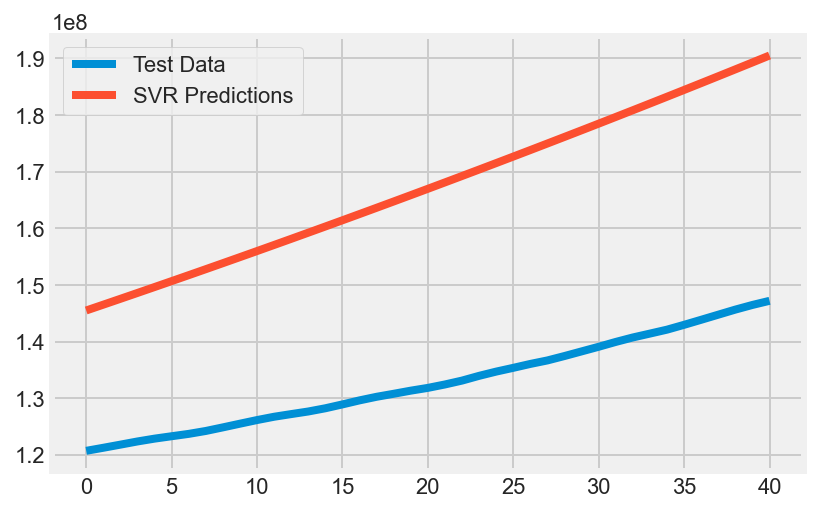

In [73]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVR Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [55]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

MAE: 4430228.715338839
MSE: 36721708169622.984


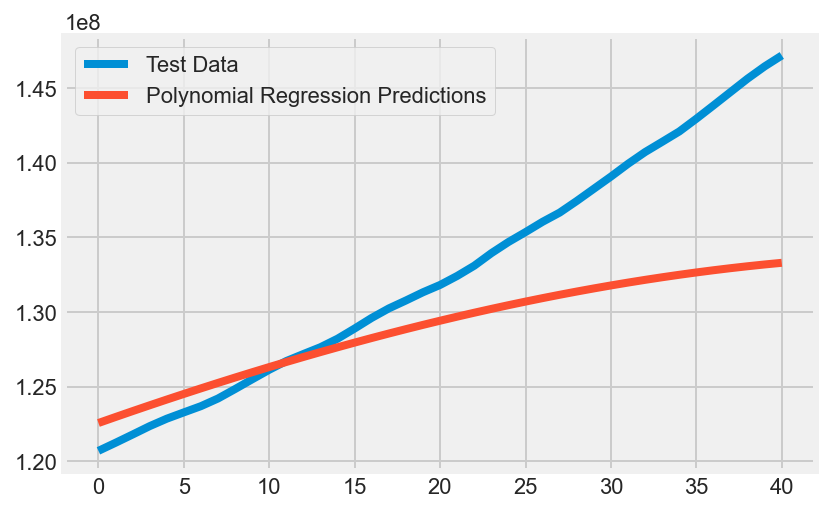

In [56]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [61]:
print(linear_model.coef_)


[[-2.12918303e+07  5.70468893e+05 -4.79734637e+03  1.86732748e+01
  -2.03282566e-02]]


In [62]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=20)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

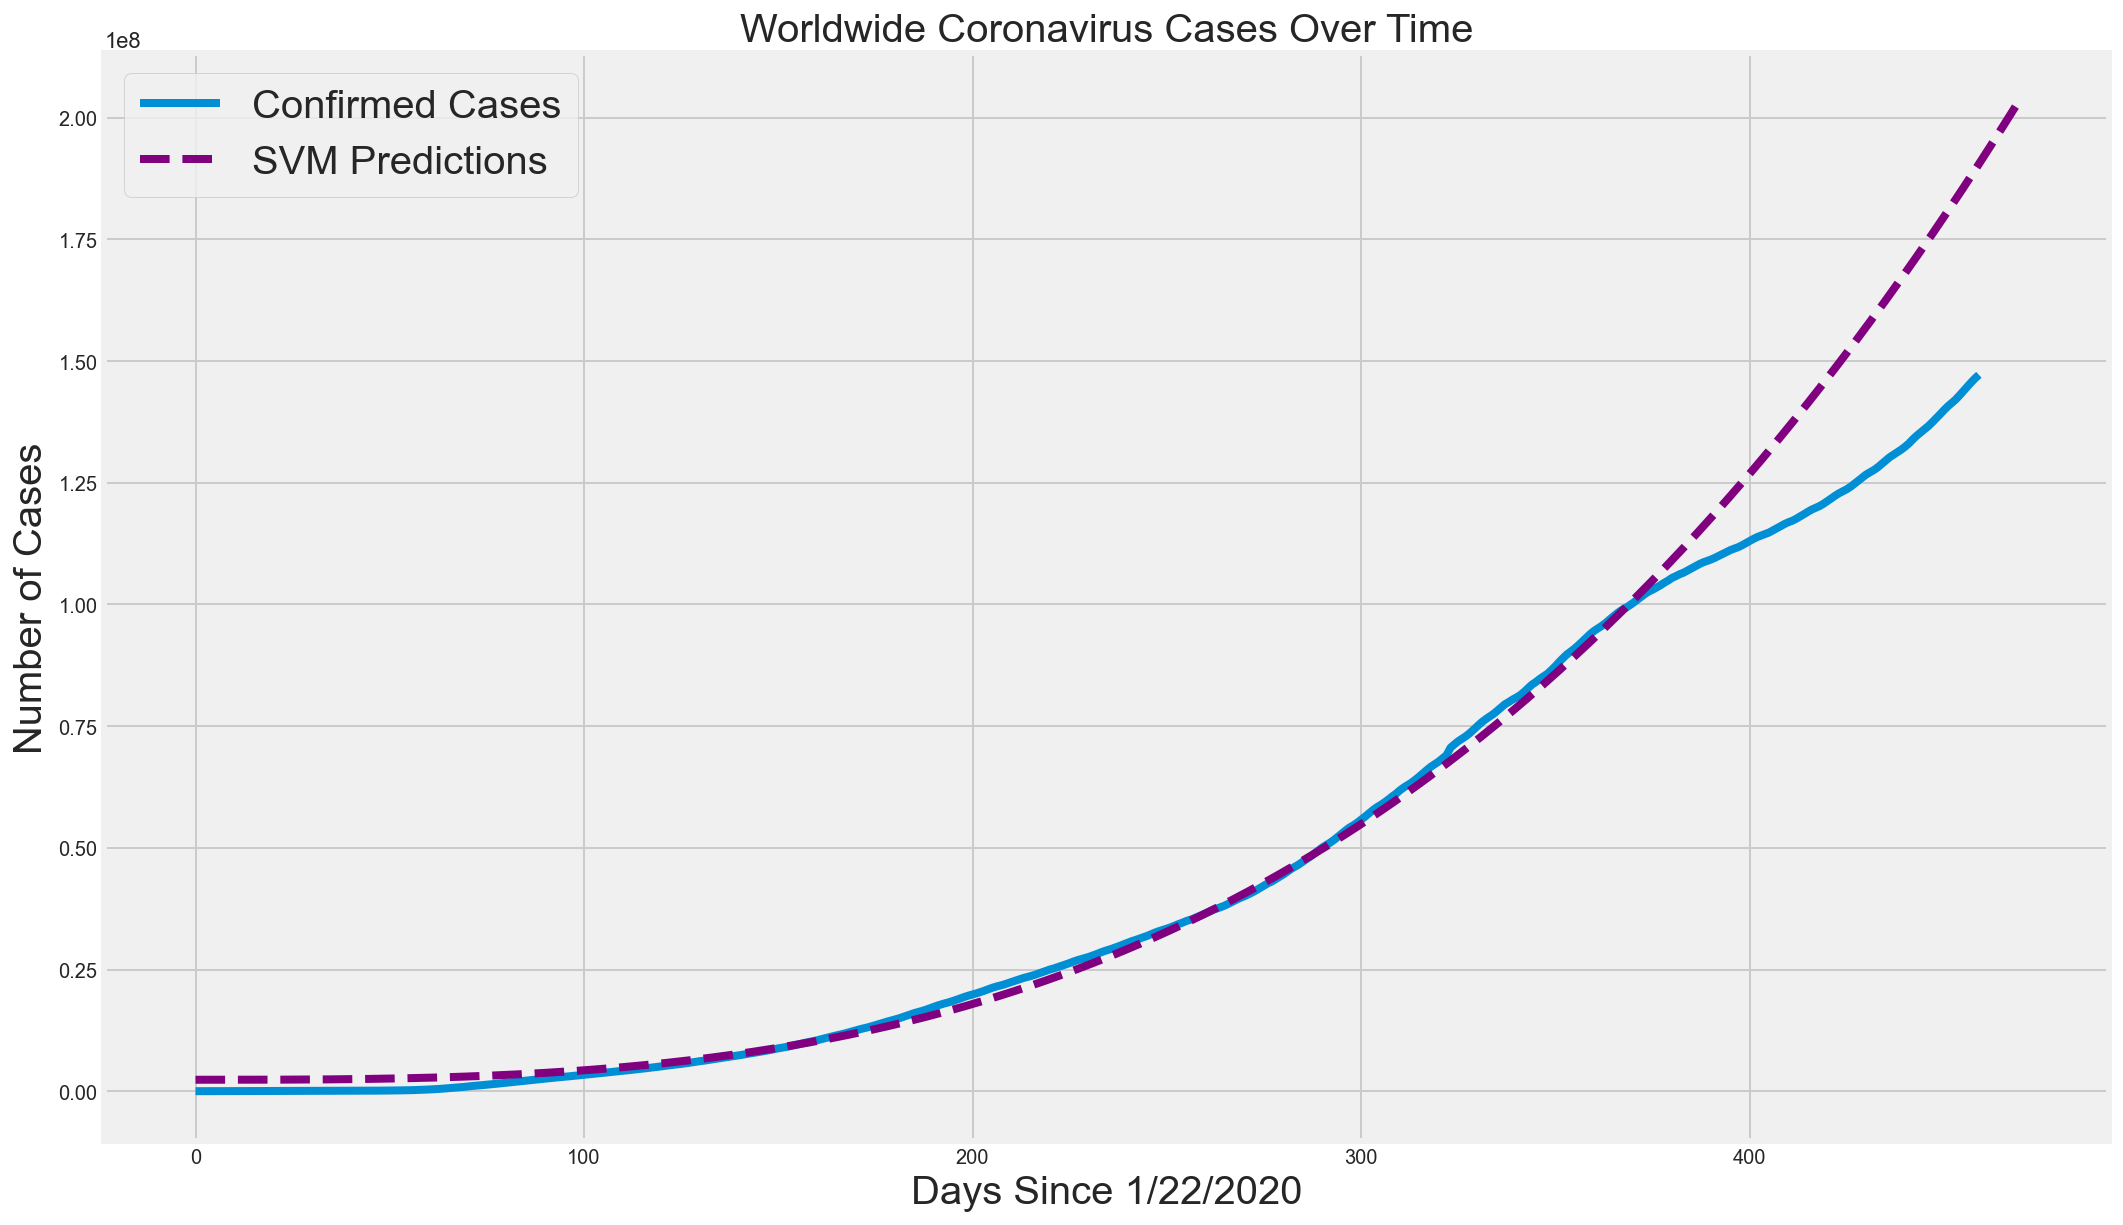

In [63]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

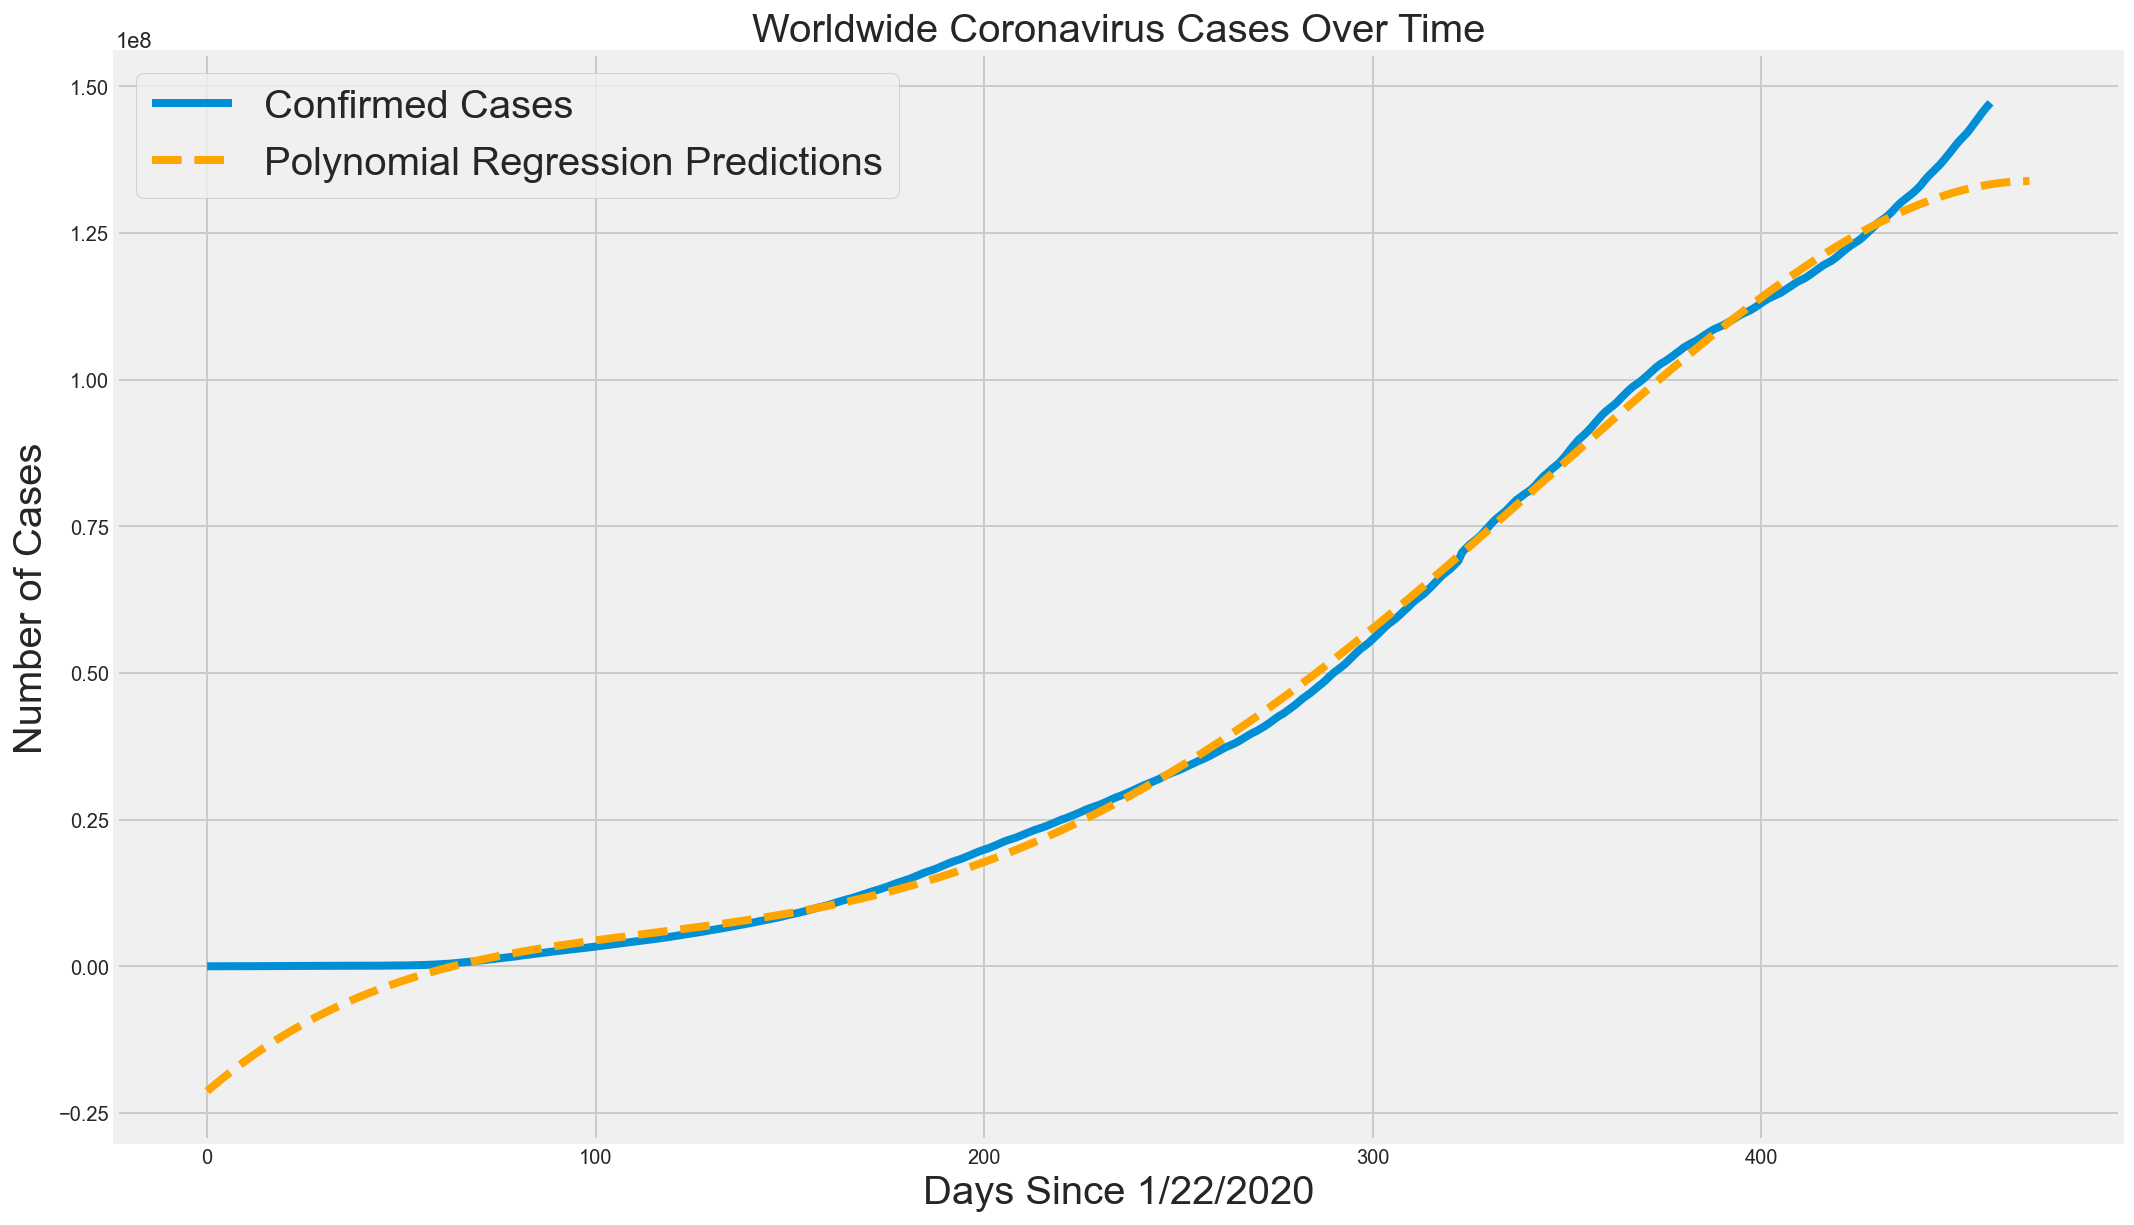

In [64]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

In [65]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted Number of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted Number of Confirmed Cases Worldwide
0,04/26/2021,191745410.000000
1,04/27/2021,192983294.000000
2,04/28/2021,194226561.000000
3,04/29/2021,195475221.000000
4,04/30/2021,196729286.000000
5,05/01/2021,197988769.000000
6,05/02/2021,199253681.000000
7,05/03/2021,200524033.000000
8,05/04/2021,201799837.000000
9,05/05/2021,203081105.000000


In [66]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted Number of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted Number of Confirmed Cases Worldwide
0,04/26/2021,133398503.000000
1,04/27/2021,133489668.000000
2,04/28/2021,133571046.000000
3,04/29/2021,133642524.000000
4,04/30/2021,133703989.000000
5,05/01/2021,133755327.000000
6,05/02/2021,133796422.000000
7,05/03/2021,133827160.000000
8,05/04/2021,133847426.000000
9,05/05/2021,133857103.000000


In [1]:
import numpy as np

In [6]:
a = np.random.randn(4, 3)
b = np.random.randn(3, 2)
c = a*b

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 

In [5]:
c.shape

(2, 3)